## Module_2: 

## Team Members:
Angelina Leung,
Neil Shroff

## Project Title:
Predicting the extent of fibrosis in the lungs at different biopsy depths.



## Project Goal:
This project seeks to analyze the prescence of pulmonary lesions at differing depths of the lung and conclude if depth plays a role in the development of Idiopathic Pulmonary Fibrosis in a Mouse Model.

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence
    * The prevalence of Idiopathic Pulmonary Fibrosis (IPF) ranged from 4 per 100,000 people 18 to 34 years of age to 227.2 per 100,000 people older than 75 years of age. Overall, the prevalence ranged from 0.8 to 64.7 per 100,000 people.
    * The incidence of IPF ranged from 1.2 to 76.4 per 100,000 people. Overall, the incidence ranged from 0.4 to 27.1 per 100,000 people.
        * Raghu G, Weycker D, Edelsberg J, Bradford WZ, Oster G. Incidence and prevalence of idiopathic pulmonary fibrosis. Am J Respir Crit Care Med. 2006 Oct 1;174(7):810-6. doi: 10.1164/rccm.200602-163OC. Epub 2006 Jun 29. PMID: 16809633.
* Risk factors (genetic, lifestyle)
    * The risk factors for developing IPF are age,smoking, sex, family history, and genetics.
    * Most cases of IPF are diagnosed for individuals in their 60s to 70s, indicating that the age of the patient correlates to a degree with the onset of IPF. Individuals that smoke have an increased risk to developing IPF. IPF is more prevalent in male patients. And a family history of IPF, especially if immediate family suffers from IPF, there is a greater likelihood that an individual will develop IPF as well. Certain genes that affect mucus production in the lungs as well as genes that ensure that telomerase is functioning correctly can also impact the pathogenesis of IPF. These genes are MUC5B, which codes for proteins that clear pathogens from the lung, this increases the risk of IPF the most. Additionally, the TERT and TERC gene mutations also increase the risk of IPF development.
        * U.S. Department of Health and Human Services. (n.d.). Causes and risk factors. National Heart Lung and Blood Institute. https://www.nhlbi.nih.gov/health/idiopathic-pulmonary-fibrosis/causes 
* Symptoms
    * The symptoms for IPF are shortness of breath, dry cough, fatigue/lethargy, extreme unintentional weight loss, fibromyalgia, clubbing of extremities.
        * Mayo Foundation for Medical Education and Research. (2024, February 15). Pulmonary fibrosis. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690 
* Standard of care treatment(s)
    * Lifestyle changes including the suspension of all smoking, excercise, eating a healthy diet, keeping up to date on vaccinations, and staying away from those with a chest cold.
    * Pirfenidone is prescribed to slow down scarring of the lungs and reduce the activity of the immune system. It is taken TID and can help with the symptoms.
    * Nintedanib is prescribed to slow down scarring as well and is taken BID. 
    * Oxygen support is also recommended to ensure that oxygen levels in the body are at normal physiological levels.
    * Pumonary rehabilitation is also used as a treatment option.
    * The cure to IPF is a lung transplant. 
        * NHS. (n.d.). Treatment -Idiopathic pulmonary fibrosis. NHS choices. https://www.nhs.uk/conditions/idiopathic-pulmonary-fibrosis/treatment/ 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Recurrent alveolar epithelial injuries are thought to be the main cause of IPF, as cells within the alveoli release inflammatory molecules such as TNF-alpha and MCP-1 as well as profibrotics. These inflammatory molecules recruit fibrocytes and the profibrotics prompt fibroblast activation and differentiation into myofibroblasts, which secrete collagen. The continual secretion of collagen and other fibrotic compounds from fibrocytes and myofibrocytes causes scar tissue formation on the lungs, thus creating a fibrosed lung.
        * Wolters, P. J., Collard, H. R., & Jones, K. D. (2014). Pathogenesis of idiopathic pulmonary fibrosis. Annual review of pathology. https://pmc.ncbi.nlm.nih.gov/articles/PMC4116429/ 

## Data-Set: 
The data set that will be analyzed will be a collection of images of mouse pulmonary tissue from varying depths of the left and right lungs. To obtain these tissue samples, first a mouse was treated with Belomycin to induce pulmonary fibrosis. Then, three weeks later the mouse was euthanized and lungs were collected and frozen with OCT. Next, a cryotome was used to section the lungs in the transverse plane and the tissue was put onto microscope slides. Finally, the slides were stained using immunofluorescent staining and imaging was then performed to enable quantification of fibrosis at varying depths. 
* The images are found in Canvas under Module #2: Data
    * https://canvas.its.virginia.edu/courses/153653/modules

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [1]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010021.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010018.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010121.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010087.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010156.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010026.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010126.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010129.jpg"
    ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    30,
    90,
    9000,
    8000,
    9200,
    330,
    2800,
    5300,
    6800,
    3250
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''



Counts of pixel by color in each image
White pixels in image 0: 23900
Black pixels in image 0: 4170404

White pixels in image 1: 33746
Black pixels in image 1: 4160558

White pixels in image 2: 161111
Black pixels in image 2: 4033193

White pixels in image 3: 155019
Black pixels in image 3: 4039285

White pixels in image 4: 163638
Black pixels in image 4: 4030666

White pixels in image 5: 38068
Black pixels in image 5: 4156236

White pixels in image 6: 73224
Black pixels in image 6: 4121080

White pixels in image 7: 96012
Black pixels in image 7: 4098292

White pixels in image 8: 102335
Black pixels in image 8: 4091969

White pixels in image 9: 82784
Black pixels in image 9: 4111520

Percent white px:
/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 30 microns

/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010018.jpg:
0.8045673370361328% White | Depth: 90 microns

/Users/Angel/OneDrive

'the .csv writing subroutine ends here'

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.166029302085318.


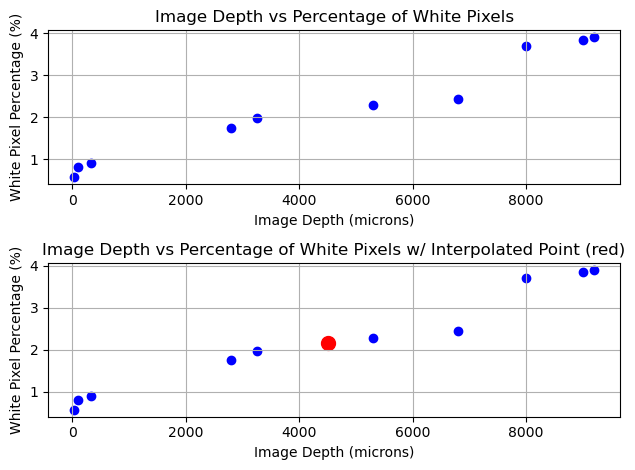

In [2]:
#Interpolate a point using linear: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Image Depth vs Percentage of White Pixels')
axs[0].set_xlabel('Image Depth (microns)')
axs[0].set_ylabel('White Pixel Percentage (%)')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Image Depth vs Percentage of White Pixels w/ Interpolated Point (red)')
axs[1].set_xlabel('Image Depth (microns)')
axs[1].set_ylabel('White Pixel Percentage (%)')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.276044173034472.


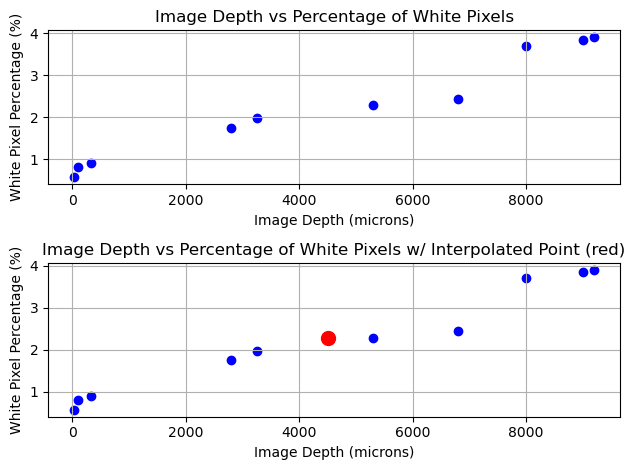

In [3]:
#quadratic 

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Image Depth vs Percentage of White Pixels')
axs[0].set_xlabel('Image Depth (microns)')
axs[0].set_ylabel('White Pixel Percentage (%)')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Image Depth vs Percentage of White Pixels w/ Interpolated Point (red)')
axs[1].set_xlabel('Image Depth (microns)')
axs[1].set_ylabel('White Pixel Percentage (%)')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
#Validate
#use 4500 microns for graphs, image 134
valfilename = [r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010134.jpg"]

# depth for image 134

valdepth = [4500]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in valfilename:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(valfilename)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(valfilename)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(valfilename)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(valfilename)):
    print(colored(f'{valfilename[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {valdepth[x]} microns')
    print()



##compare percent error with linear and quadratic model at 4500 microns

# Linear
lin_y = 2.166029302085318
actual_y = 2.185177803039551

linpercenterr = (abs(actual_y - lin_y)/actual_y)*100
rlin = round(linpercenterr, 3) #rounding percent error to 3 decimal pts

# Quadratic
quad_y = 2.276044173034472

quadpercenterr = (abs(actual_y - quad_y)/actual_y)*100
rquad = round(quadpercenterr, 3)

print("Percent error for linear model: ", rlin, "%")
print("Percent error for quadratic model: ", rquad, "%")

Counts of pixel by color in each image
White pixels in image 0: 91653
Black pixels in image 0: 4102651

Percent white px:
/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010134.jpg:
2.185177803039551% White | Depth: 4500 microns

Percent error for linear model:  0.876 %
Percent error for quadratic model:  4.158 %


## Verify and validate your analysis: 
Initially, the team created a code that would calculate the amount of black and white pixels that were found in a variety of lung lesion images. This was then analyzed to see the percentage of white and black pixels that were found in each image, this relates to the amount of fibrosis in the lungs, with a higher white pixel percentage indicating a larger area of lung contained fibrosis. Moreover, the data that was collected from the images (filename, depth, and percentage of white pixels) was used in a dataframe that was exported via a CSV file. Next, the team utilized the linear and quadratic interpolation function in python to interpolate data points that had depths not explicitly included in the data set. Each interpolation printed a scatterplot with the known white pixel percentage vs. the depth in black and included the interpolated point in red. Furthermore, to validate which interpolation would lead to more reliable results between two known points, an error analysis was conducted where a known point was excluded from the code and used as an interpolation point, using linear and quadratic interpolation. Then comparing the interpolated value of both to the known value one can observe which interpolation has a lower percent error and select that one to interpolate between two points. Both of the graphs indicate that more distal pulmonary tissue has a higher instance of fibrosis in this mouse model. This is supported by the literature as well, stating that distal airways could be affected more due to more irritants such as smoke being deposited there at higher rates, the genetic risk factors mostly affect the dital airways, and distal airways could have an unregulated "jamming" mechanism. 

Stancil IT, Michalski JE, Davis-Hall D, Chu HW, Park JA, Magin CM, Yang IV, Smith BJ, Dobrinskikh E, Schwartz DA. Pulmonary fibrosis distal airway epithelia are dynamically and structurally dysfunctional. Nat Commun. 2021 Jul 27;12(1):4566. doi: 10.1038/s41467-021-24853-8. PMID: 34315881; PMCID: PMC8316442.

## Conclusions and Ethical Implications: 
Distal pulmonary tissue experiences an increase in the amount of lesions found in a mouse model of idiopathic pulmonary fibrosis due to the various environmental and genetic risk factors impacting that region of the tissue at a greater rate compared to proximal regions of pulmonary tissue. This conclusion could impact future treatments and research in the field, as researchers could identify certain protein markers specific to pulmonary tissue and create various medicinal transports to target the distal tissue and treat/cure this disorder. Additionally, when physicians are treating patients with IPF, they should educate them on the latest findings in the research and ensure that any drugs they are on will not negatively impact the distal pulmonary tissue. Ethically, researchers and physicians should work to ensure the continuation of distal pulmonary research in IPF and educate the public to the best of their ability on what is known about the disorder. 

## Limitations and Future Work: 
This study is limited, as it is pulmonary fibrosis on a mouse model treated with Belomycin and the pathogenesis of IPF may vary in a human model. Additionally, having a larger dataset with pulmonary tissue before and after treatment with Belomycin could aid in understanding how the disease progresses in pulmonary tissue. In the future, a longitudinal dataset with more data points could increase the validity of the study and provide more insights on the pathogenesis of IPF. Ethically, due to this being a mouse model, one should be aware when translating the results to humans, as it may vary from species to species. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

link to google doc: https://docs.google.com/document/d/1LEvCI1sEN08UnDGnRVgoqyb2DAQW0L3-goclZzwHFTY/edit?usp=sharing

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

In [5]:
#Currently have no questions